In [127]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset Load

In [128]:
df_train_path = os.path.join("train.csv")
df_test_path = os.path.join("test.csv")
df_train = pd.read_csv(df_train_path)
df_test = pd.read_csv(df_test_path)

In [129]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dataset Cleanup

In [130]:
#Name doesn't really have an impact on survivability
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

In [131]:
#Let's assume that Cabin doesn't have impact on survivability (could have)
df_train.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

In [132]:
#Ticket Number also haven't impact
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

In [133]:
df_train.set_index('PassengerId', inplace=True)
df_test.set_index('PassengerId', inplace=True)

# Data Preprocessing just for Analysis

In [134]:
df_train['Sex_Prep'] = pd.get_dummies(df_train['Sex'])['male']
df_test['Sex_Prep'] = pd.get_dummies(df_test['Sex'])['male']

In [135]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked'], drop_first=True)], axis=1).rename(index=str, columns={'Q':'Embarked_Q', 'S':'Embarked_S'})
df_test = pd.concat([df_test, pd.get_dummies(df_test['Embarked'], drop_first=True)], axis=1).rename(index=str, columns={'Q':'Embarked_Q', 'S':'Embarked_S'})

In [136]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Prep,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1,0,1
2,1,1,female,38.0,1,0,71.2833,C,0,0,0
3,1,3,female,26.0,0,0,7.9250,S,0,0,1
4,1,1,female,35.0,1,0,53.1000,S,0,0,1
5,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [137]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Prep,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,1,1,0
893,3,female,47.0,1,0,7.0000,S,0,0,1
894,2,male,62.0,0,0,9.6875,Q,1,1,0
895,3,male,27.0,0,0,8.6625,S,1,0,1
896,3,female,22.0,1,1,12.2875,S,0,0,1


# Data analysis

Total train passengers: 891
Total women: 314 Died: 81 Survived: 233
Total men: 577 Died: 468 Survived: 109


Total Class 1: 216 Died: 80 Survived: 136
Total Class 2: 184 Died: 97 Survived: 87
Total Class 3: 491 Died: 372 Survived: 119


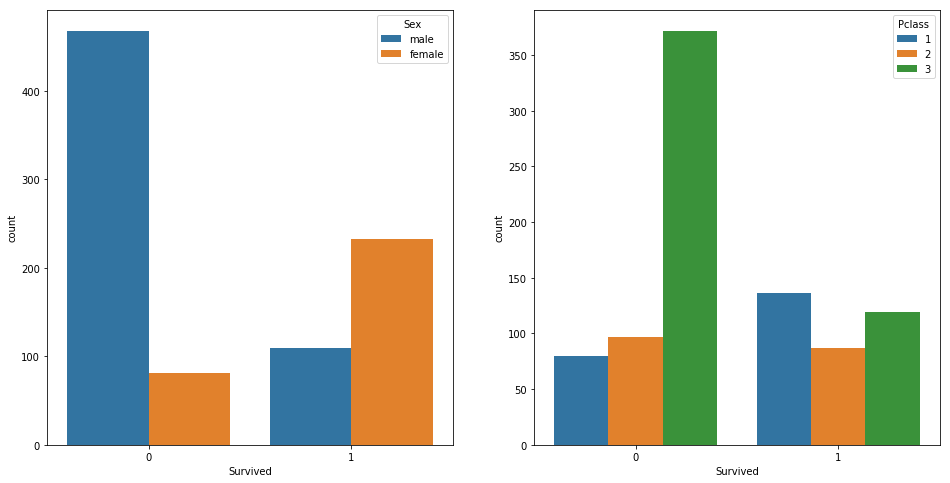

In [138]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

sns.countplot(x='Survived', data = df_train, hue='Sex', ax=ax1)
sns.countplot(x='Survived', data = df_train, hue='Pclass', ax=ax2)
print("Total train passengers: %s" % df_train.shape[0])
print("Total women: %s Died: %s Survived: %s" % 
      (df_train[df_train['Sex'] == 'female'].shape[0],
       df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 0)].shape[0],
       df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)].shape[0]
      ))

print("Total men: %s Died: %s Survived: %s\n\n" % 
      (df_train[df_train['Sex'] == 'male'].shape[0],
       df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 0)].shape[0],
       df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)].shape[0]
      ))

print("Total Class 1: %s Died: %s Survived: %s" % 
      (df_train[df_train['Pclass'] == 1].shape[0],
       df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 0)].shape[0],
       df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)].shape[0]
      ))

print("Total Class 2: %s Died: %s Survived: %s" % 
      (df_train[df_train['Pclass'] == 2].shape[0],
       df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 0)].shape[0],
       df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 1)].shape[0]
      ))

print("Total Class 3: %s Died: %s Survived: %s" % 
      (df_train[df_train['Pclass'] == 3].shape[0],
       df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 0)].shape[0],
       df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 1)].shape[0]
      ))



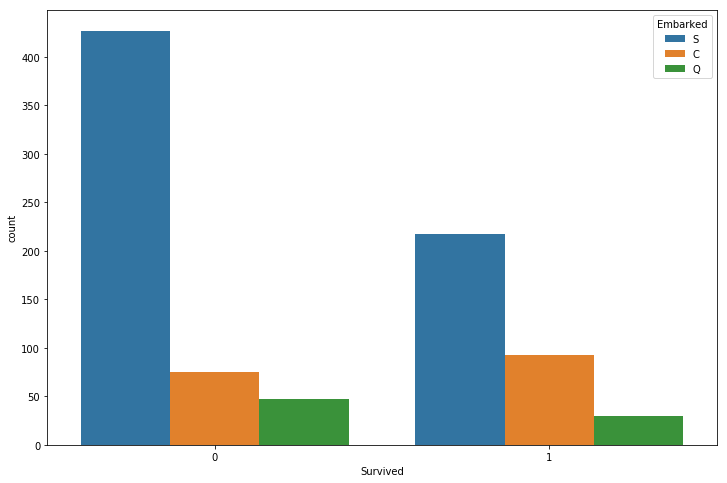

In [139]:
plt.figure(figsize=(12,8))
sns.countplot(x='Survived', data = df_train, hue='Embarked')

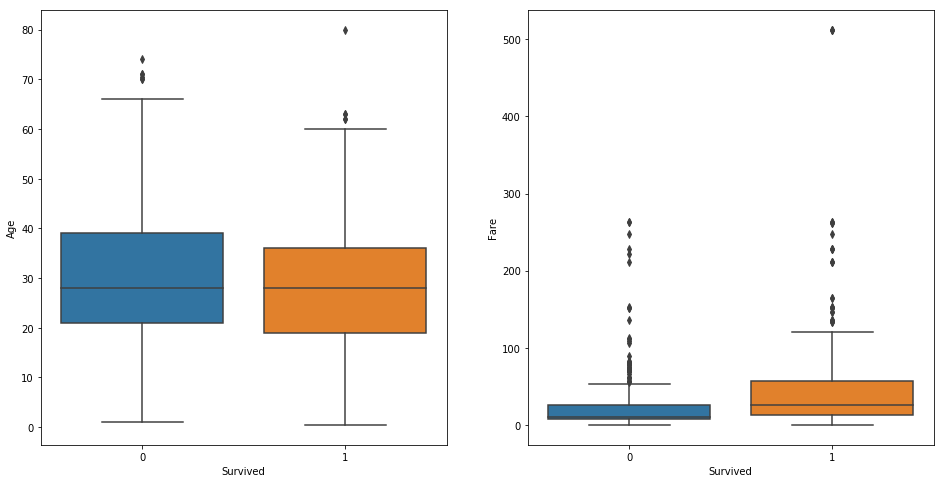

In [140]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
sns.boxplot(x='Survived', y='Age', data=df_train, ax=ax1)
sns.boxplot(x='Survived', y='Fare', data=df_train, ax=ax2)

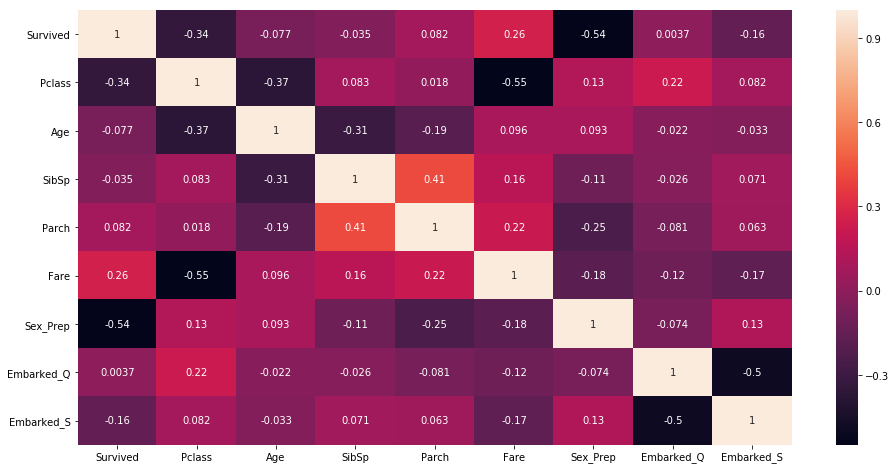

In [141]:
plt.figure(figsize=(16,8))
sns.heatmap(df_train.corr(), annot=True)

** According to heatmap, most impact comes from Pclass and sex **

# Model Build

In [143]:
df_train.drop(['Sex', 'Embarked'], axis=1, inplace=True)
df_test.drop(['Sex', 'Embarked'], axis=1, inplace=True)

ValueError: labels ['Sex' 'Embarked'] not contained in axis

In [165]:
df_train['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
6       NaN
7      54.0
8       2.0
9      27.0
10     14.0
11      4.0
12     58.0
13     20.0
14     39.0
15     14.0
16     55.0
17      2.0
18      NaN
19     31.0
20      NaN
21     35.0
22     34.0
23     15.0
24     28.0
25      8.0
26     38.0
27      NaN
28     19.0
29      NaN
30      NaN
       ... 
862    21.0
863    48.0
864     NaN
865    24.0
866    42.0
867    27.0
868    31.0
869     NaN
870     4.0
871    26.0
872    47.0
873    33.0
874    47.0
875    28.0
876    15.0
877    20.0
878    19.0
879     NaN
880    56.0
881    25.0
882    33.0
883    22.0
884    28.0
885    25.0
886    39.0
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [155]:
X = df_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_Prep', 'Embarked_Q', 'Embarked_S']]
Y = df_train[['Survived']]

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [160]:
svmc = SVC()
svmc.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').